El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio3.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código. **Recuerde escribir el nombre de todos los integrantes que trabajaron en la elaboración del entregable**.


---



**Integrantes**:
1. NN1
2. NN2
3. NN3

# LABORATORIO 3: PREPROCESAMIENTO

OBJETIVOS:

1. APRENDER A RESOLVER PROBLEMAS DE INCONSISTENCIA O VALORES ATÍPICOS.

2. VER ALGUNAS DE LAS PRINCIPALES TRANSFORMACIONES.

3. APLICAR TEST ESTADÍSTICOS PARA DESCARTAR ATRIBUTOS.


---



In [0]:
# 1. Importar las librerias
import pandas as pd

# 2. Importar los datos
# load data
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv(url, names=names)
diabetes.head()



,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


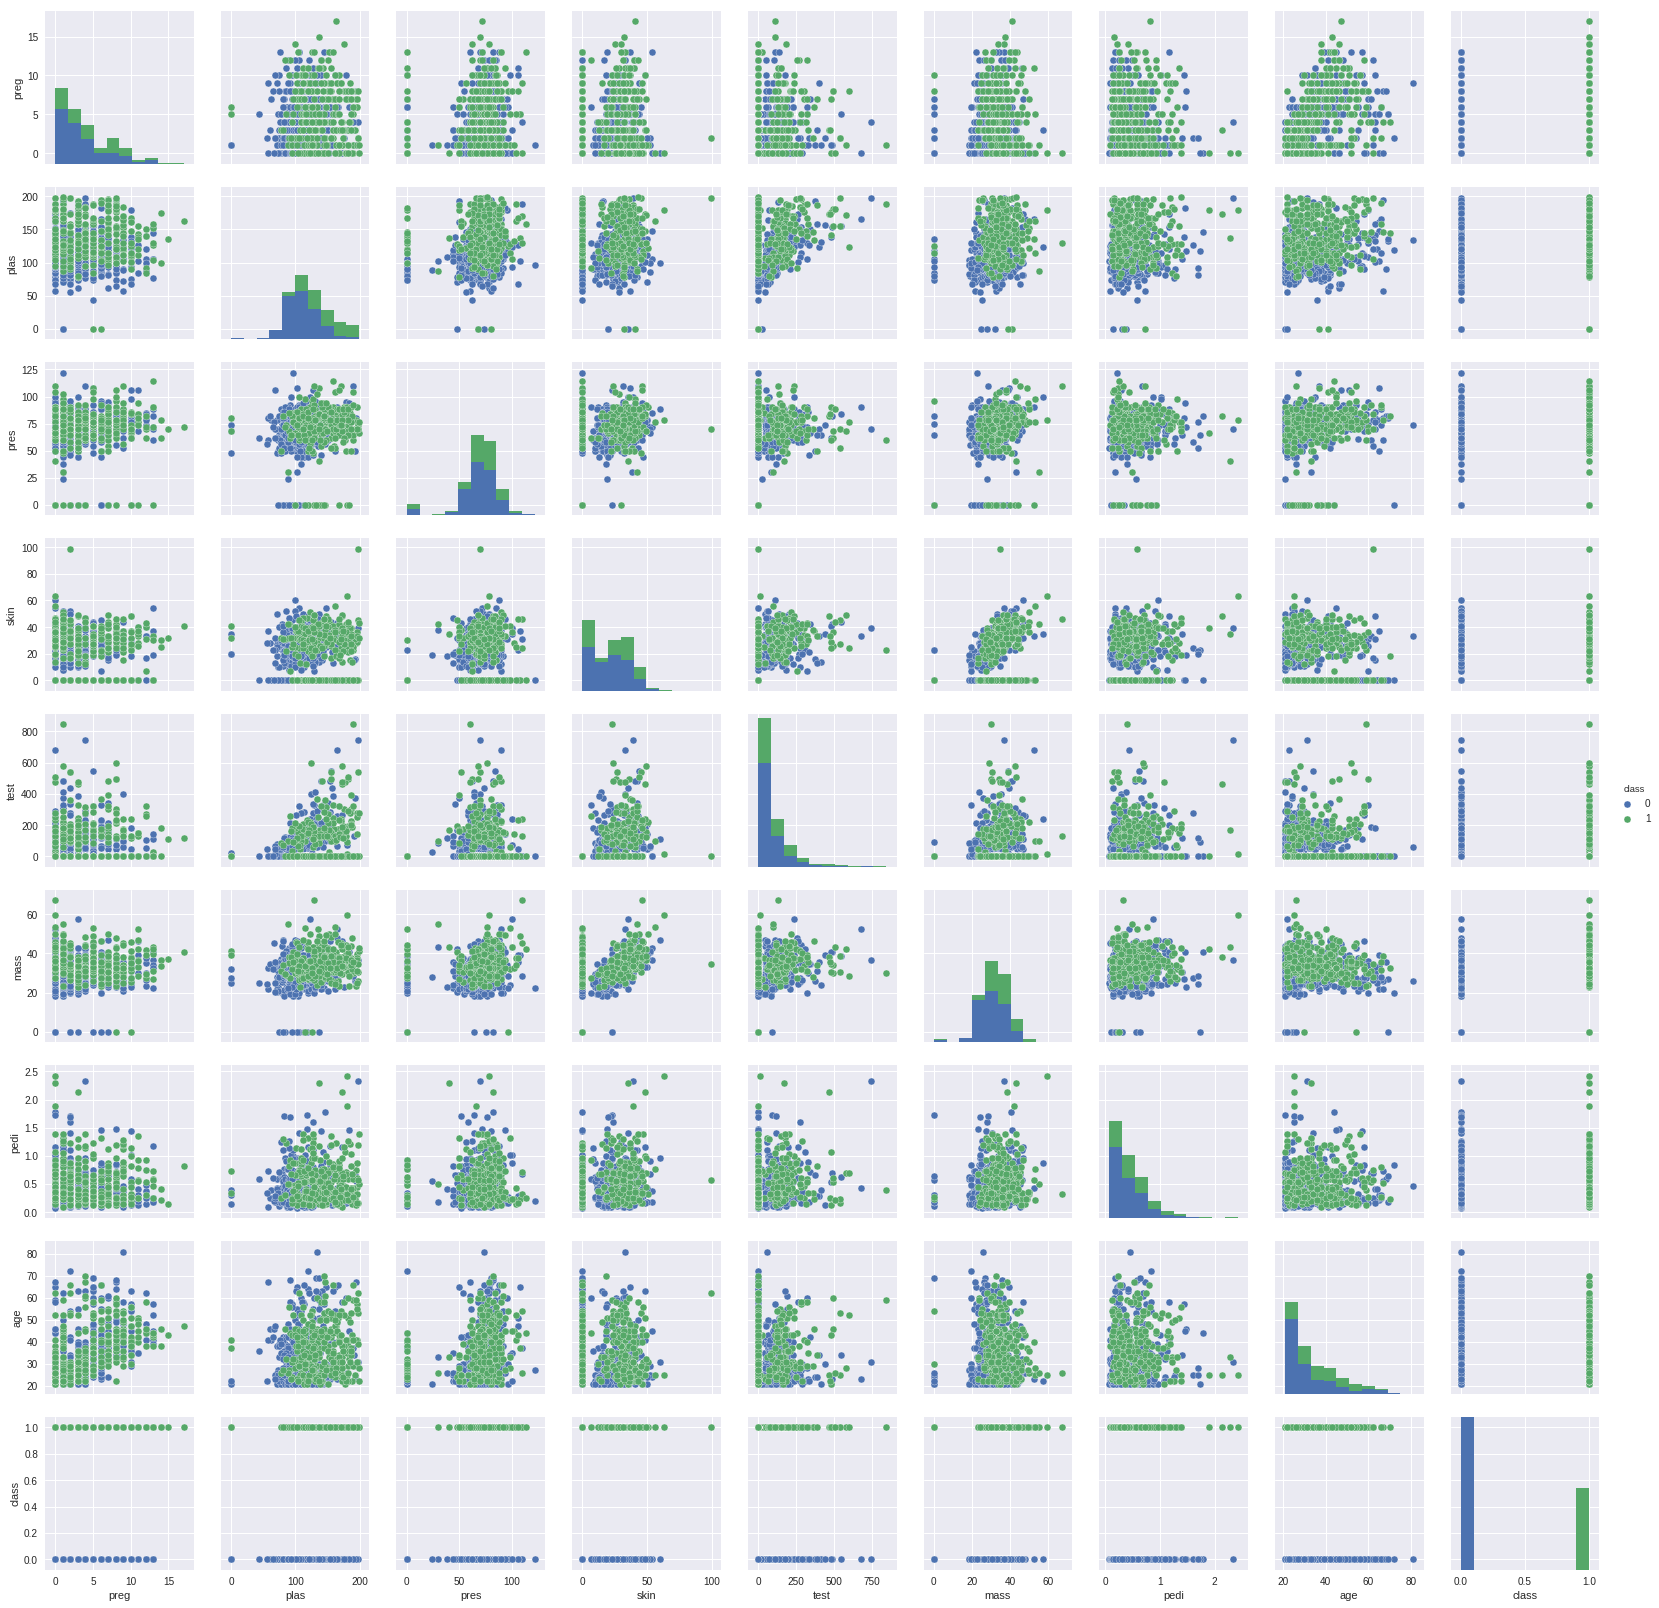

In [0]:
import seaborn as sns
sns.set()
sns.pairplot(diabetes, hue="class")

In [0]:
#summary
diabetes.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


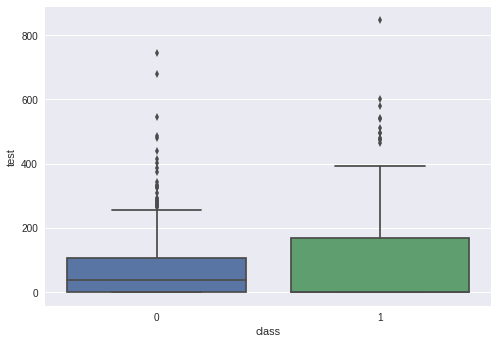

In [0]:
sns.boxplot(x="class", y="test", data=diabetes)




---


## 1. MISSING VALUES



In [0]:
# Omitir valores extremos
diabetes['test'] = diabetes['test'].mask(diabetes['test'] > 450)

In [0]:
diabetes[diabetes.isnull().any(axis=1)].head()

,preg,plas,pres,skin,test,mass,pedi,age,class
8,2,197,70,45,NaN,30.5,0.158,53,1
13,1,189,60,23,NaN,30.1,0.398,59,1
111,8,155,62,26,NaN,34.0,0.543,46,1
153,1,153,82,42,NaN,40.6,0.687,23,0
186,8,181,68,36,NaN,30.1,0.615,60,1


In [0]:
#Imputar valores perdidos por el promedio
diabetes = diabetes.apply(lambda x: x.fillna(x.mean()),axis=0)
diabetes[diabetes.isnull().any(axis=1)].head()
#Ya no hay missing values

,preg,plas,pres,skin,test,mass,pedi,age,class


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


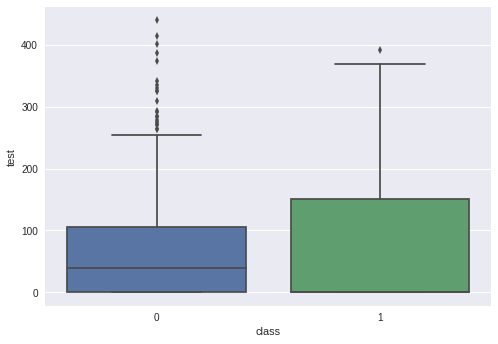

In [0]:
sns.boxplot(x="class", y="test", data=diabetes)



---


## 2. TRANSFORMACIÓN

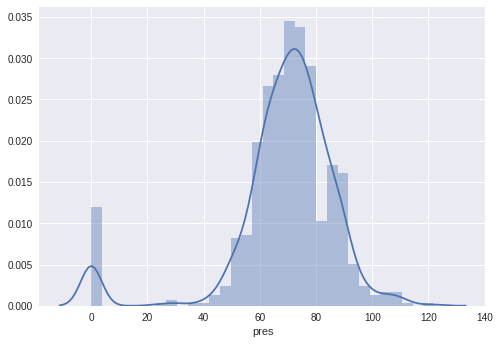

In [0]:
sns.distplot(diabetes['pres'])

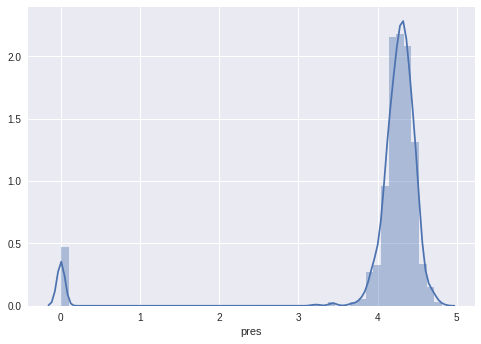

In [0]:
import numpy as np
sns.distplot(np.log(1 + diabetes['pres']))

## 3. SELECCIÓN DE ATRIBUTOS POR FILTRO



---


**Relevancia**: Yu y Liu (2004) definien el conjunto de caracteristicas optimas como que se compone de todas las caracteristicas fuertemente relevantes y las debilmente relevantes, pero no redundantes.


---



### 3.1 Varianza

In [0]:
print(diabetes.std())

preg       3.369578
plas      31.972618
pres      19.355807
skin      15.952218
test     115.244002
mass       7.884160
pedi       0.331329
age       11.760232
class      0.476951
dtype: float64


### 3.2 Correlación

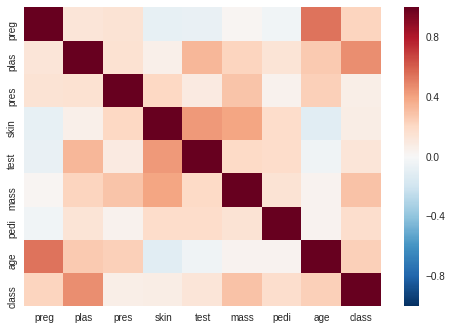

In [0]:
import seaborn as sns


corr = diabetes.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 3.3 $X^{2}$-squared

In [0]:
pd.crosstab(diabetes['age'], diabetes['class']).head()

class,0,1
age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14


In [0]:
from scipy.stats import chi2_contingency
p_value_chi = chi2_contingency(pd.crosstab(diabetes['age'], diabetes['class']))[1]
if p_value_chi < 0.05:
    print('CHI-test : reject assumption that there is no association between the two variables')
    print('p-value : {0}% \n'.format(int(p_value_chi*100)))
else:
    print('CHI-test : we cannot reject the assumption that there is no association between the two variables')
    print('p-value: {0}% \n'.format(int(p_value_chi*100)))

CHI-test : reject assumption that there is no association between the two variables
p-value : 0% 



### 3.4 Kolmogorov-Smirnov

In [0]:
from scipy.stats import ks_2samp

diabetes_si = diabetes.loc[diabetes['class'] == 1]
diabetes_no = diabetes.loc[diabetes['class'] == 0]

p_value_ks = ks_2samp(diabetes_si['mass'], diabetes_no['mass'])[1]
if p_value_ks < 0.05:
    print('KS-test : reject the hypothesis that the distributions of the two samples are the same')
    print('p-value : {0}% \n'.format(int(p_value_ks*100)))
else:
    print('KS-test : we cannot reject the hypothesis that the distributions of the two samples are the same')
    print('p-value: {0}% \n'.format(int(p_value_ks*100)))

KS-test : reject the hypothesis that the distributions of the two samples are the same
p-value : 0% 



## 4. INVESTIGACIÓN (3 ptos)


---


### Transformación (1.5 ptos)
4.1 ¿En qué consisten las transformaciones Box-Cox, Z-Score y
Max-Min? Describa las ventajas y desventajas de cada una de
estas transformaciones en una tabla.



4.2 ¿Es estrictamente necesario realizar una transformación de los
atributos en un proceso de minería de datos?¿En qué casos
podría no ser necesario?


---


### Selección de atributos (1.5 ptos)

4.3 ¿En qué consisten los métodos de Análisis de Correlación,
Análisis de Componentes Principales (PCA), Tablas de
contingencia (Crosstabs), Test $x^2$ y Test ANOVA?

4.4 ¿Es relevante el orden en el que se aplican las técnicas de
extracción de atributos?


---



## 5. LABORATORIO (3 ptos)


---
Considere el problema que enfrenta una entidad financiera que tiene altas tasas de no pago (*default*). Esta institución pretende implementar modelos de predicción que le permita identificar que clientes no pagaran en un determinado horizonte de tiempo. Sin embargo, primero es necesario consolidar y preparar la base de datos para el desarrollo e implementación de los modelos.


**El objetivo de este laboratorio es trabajar la base de datos para resolver los problemas de inconsistencia, dejando la base lista para aplicar modelos de minería de datos.**


---



#### TAREAS:

5.1 Resuelva los problemas de inconsistencia y valores pérdidos en la base de datos, justificando cada una de sus decisiones (1.5 ptos)

(BONUS - 0.5 ptos) Implemente un método de imputación de datos perdidos basado en una regresión lineal, utilizando como regresores los atributos del dataset. La implementación puede ser apoyada en librerias, pero no utilizar una implementación previa.

5.2 Transforme y escale las variables que sea necesario para permitir el procesamiento de la información de los modelos (0.5 ptos)

5.2 Aplique las técnicas de selección que considere pertinentes y elimine de la base aquellos atributos que no son relevantes según sus criterios (1.0 pto)

---
Variable | Descripción
------------- | -------------
1. customer | ID
2. Age | Edad
3. Employ | Años en el mismo empleo
4. Address | Años viviendo en el mismo lugar
5. Income | Ingreso en USD
6. Debtinc | Ratio Ingreso/Deuda
7. Creddebt | Monto de deuda en tarjetas de crédito
8. OthDebt | Monto de otras deudas
9. Education | Nivel educacional
10. Nationality | Nacionalidad
11. Default | Variable objetivo

In [0]:
#Guía completa : https://colab.research.google.com/drive/1SU176zTQvhflodEzuiacNrzxFQ6fWeWC#scrollTo=42Dvi-sgxNqz
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1DqtiXziQNHvf0NN_RyFM2qvguWSQqHbZ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('exported.xlsx')

In [0]:
!pip install -q xlrd
import pandas as pd
df = pd.read_excel('exported.xlsx')
df.head()

,customer,Age,Employ,Address,Income,Debtinc,Creddebt,OthDebt,Education,Nationality,Default
0,10012,28.0,7,2.0,44.0,17.7,2.99,4.80,Med,N,N
1,10017,64.0,34,17.0,116.0,14.7,5.05,12.00,Posg,N,N
2,10030,40.0,20,12.0,61.0,4.8,1.04,1.89,Bas,N,N
3,10039,30.0,11,3.0,27.0,34.5,1.75,7.56,Bas,N,N
4,10069,25.0,2,2.0,30.0,22.4,0.76,5.96,Bas,N,S


In [0]:
df.describe()

,customer,Age,Employ,Address,Income,Debtinc,Creddebt,OthDebt
count,1200.000000,1199.000000,1200.000000,1199.000000,1198.000000,1199.000000,1200.000000,1200.000000
mean,221336.065833,35.962469,7.062500,6.387823,60.000000,10.192494,2.002500,4.024317
std,132024.173652,57.447467,9.172897,6.094735,67.805486,6.859423,2.949625,5.619132
min,10012.000000,18.000000,0.000000,0.000000,-149.000000,0.100000,0.010000,0.010000
25%,89926.000000,24.000000,0.000000,2.000000,28.000000,4.900000,0.437500,1.137500
50%,269681.500000,31.000000,4.000000,5.000000,40.000000,8.800000,1.050000,2.325000
75%,343749.000000,42.000000,10.000000,9.500000,65.000000,13.900000,2.340000,4.742500
max,372571.000000,1970.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000
